## Load and Inspect the Data :

---





*   Reads the dataset from a CSV file.
*   Displays the first five rows to get an overview.






In [1]:
import numpy as np
import pandas as pd
data =pd.read_csv('/content/drive/MyDrive/car_price_dataset.csv')
print(data.head())

        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  


In [2]:
data

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


## Clean the data :

---




*   Handle the missing value null
*   Remove duplicates

In [3]:
print(data.isnull().sum())

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


if is exist that is null
Drop rows
#data.dropna(inplace=True)

In [ ]:
df = pd.DataFrame(data)
duplicate = df.duplicated().sum()
print(duplicate)

0


Drop duplicates
#data.drop_duplicates(inplace=True)

## Statistical summary :

---




*   mean, median, min, max.

In [ ]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


## Detect and Remove outliers :

---



*   List item using IQR Interquartile Range method




<Axes: >

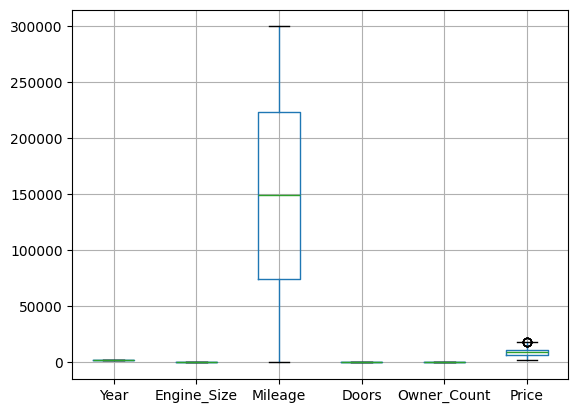

In [ ]:
df.boxplot()

<Axes: ylabel='Price'>

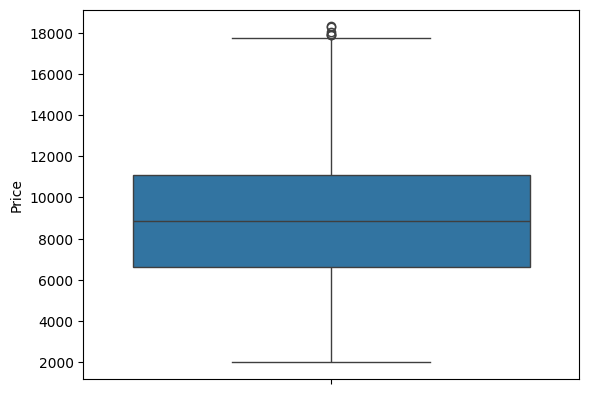

In [ ]:
import seaborn as sns
sns.boxplot(df['Price'])

In [ ]:
percent25 = df['Price'].quantile(0.25)
percent75 = df['Price'].quantile(0.75)

In [ ]:
iqr = percent75 - percent25

In [ ]:
upper_limit = percent75 + 1.5 * iqr
lower_limit = percent25 - 1.5 * iqr

In [ ]:
new_df = df[df['Price'] < upper_limit]
new_df.shape

(9994, 10)

<Axes: ylabel='Price'>

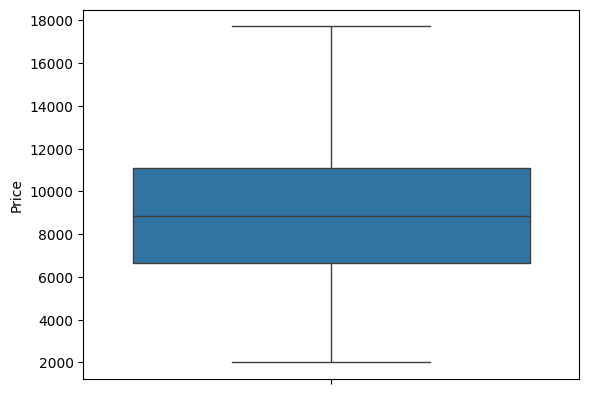

In [ ]:
sns.boxplot(new_df['Price'])

## Data visualization :

---



*   Boxplot to check for outliers in all features.
*   Boxplot for Price column to check for outliers and Boxplot after outlier removal.
*   Pairplot to visualize feature relationships.

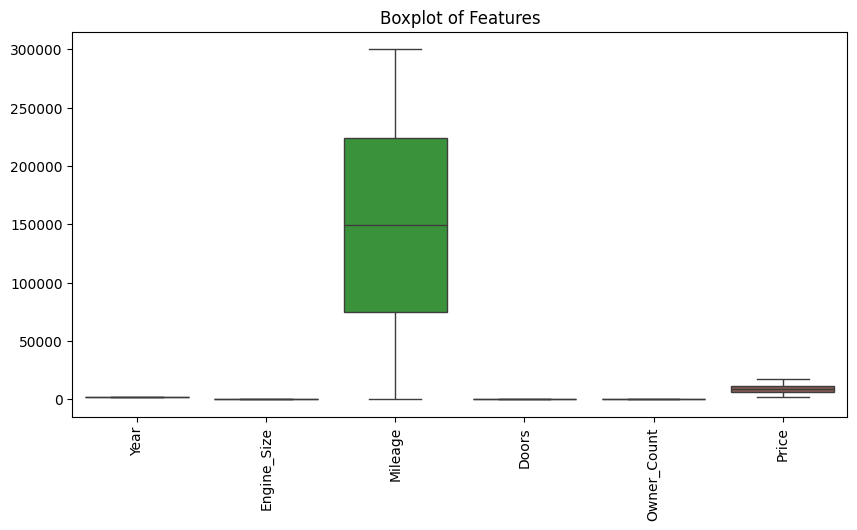

In [ ]:
import matplotlib.pyplot as plt

# Boxplot to check for outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=new_df)
plt.title("Boxplot of Features")
plt.xticks(rotation=90)
plt.show()


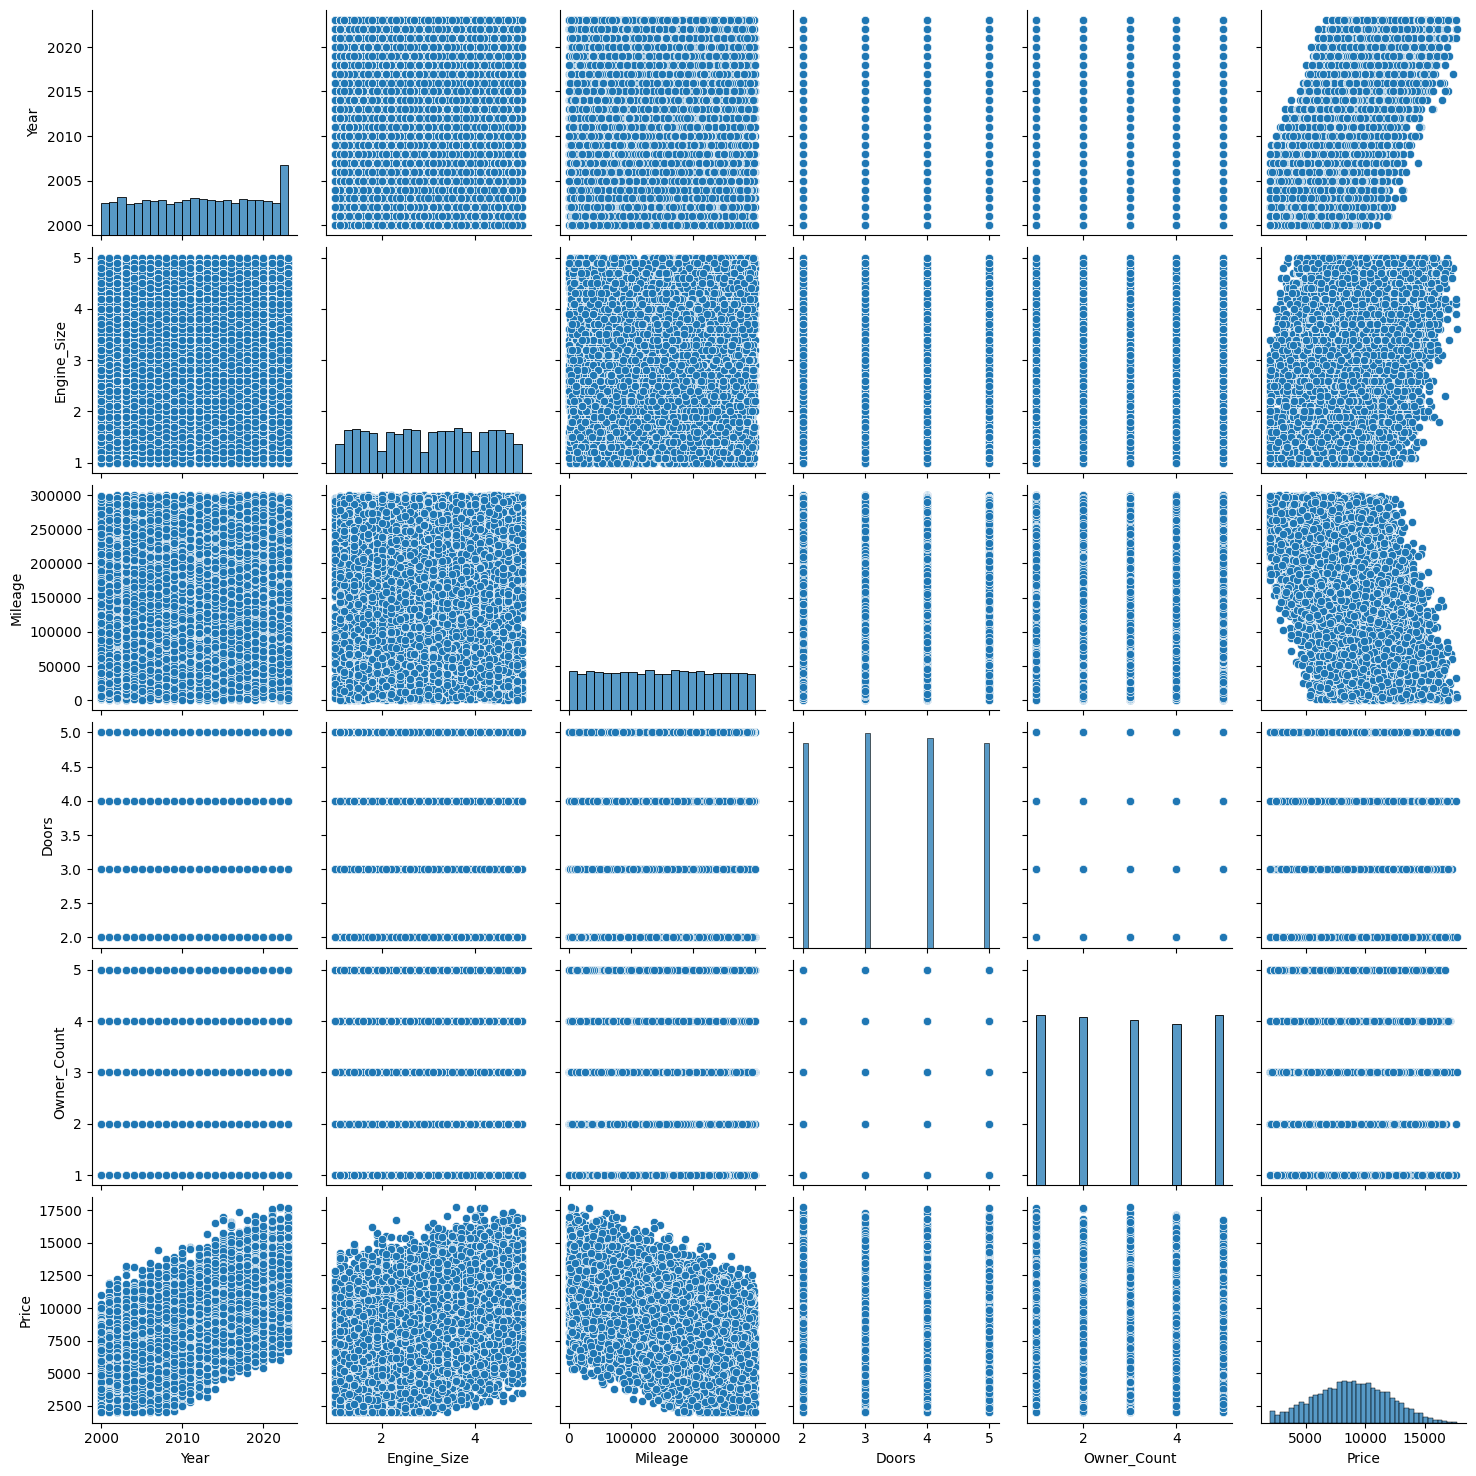

In [ ]:
# Pairplot for feature relationships
sns.pairplot(new_df)
plt.show()